In [101]:
from typing import TypedDict, Dict, List, Optional
import random
from langgraph.graph import StateGraph, START, END

In [102]:
class AgentState(TypedDict):
   initGuess : int
   lowerBound : int
   upperBound : int
   target : int
   count : int
   countMax : int

In [103]:
def setUp(state: AgentState) -> AgentState:
    """Set up the guessing game

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    state['target'] = random.randint(state['lowerBound'], state['upperBound'])
    state['count'] = 0
    
    return state
    
def guess(state: AgentState) -> AgentState:
    """Node to guess number

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    print(f"initGuess: {state['initGuess']}, lowerBound: {state['lowerBound']}, lowerBound: {state['upperBound']}, target: {state['target']}, count: {state['count']}, countMax: {state['countMax']}")
    
    if state['initGuess'] == state['target']:
        print(f"Guess {state['count']}: target reached")
        return state
    
    if state['count'] == state['countMax']:
        print(f"Couldn't guess in {state['count']} attempts")
        return state
        
    
    if state['initGuess'] > state['target']:
        print(f"Guess {state['count']}: Guess too high")
        state['upperBound'] = state['initGuess'] - 1
    else:
        print(f"Guess {state['count']}: Guess too low")
        state['lowerBound'] = state['initGuess'] + 1
        
    state['count'] += 1
    state['initGuess'] = (state['lowerBound'] + state['upperBound']) // 2
    
    return state
    
def should_continue(state: AgentState) -> str:
    """Function to loop

    Args:
        state (AgentState): _description_

    Returns:
        str: Routing strings
    """
    
    if state['count'] < state['countMax'] and state['initGuess'] != state['target']:
        return "continue"
    else:
        return "exit"
        
        

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("setUp", setUp)
graph.add_node("guess", guess)

graph.add_edge(START, "setUp")
graph.add_edge("setUp", "guess")

graph.add_conditional_edges(
    "guess",
    should_continue,
    {
        "continue": "guess",
        "exit" : END
    }
)

app = graph.compile()


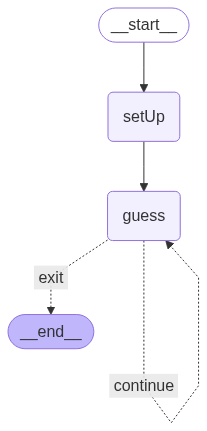

In [105]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [106]:
result = app.invoke({
    "initGuess" : 5,
    "lowerBound" : 1,
    "upperBound" : 20,
    "target" : 0,
    "count" : 0,
    "countMax" : 7
})


initGuess: 5, lowerBound: 1, lowerBound: 20, target: 18, count: 0, countMax: 7
Guess 0: Guess too low
initGuess: 13, lowerBound: 6, lowerBound: 20, target: 18, count: 1, countMax: 7
Guess 1: Guess too low
initGuess: 17, lowerBound: 14, lowerBound: 20, target: 18, count: 2, countMax: 7
Guess 2: Guess too low
initGuess: 19, lowerBound: 18, lowerBound: 20, target: 18, count: 3, countMax: 7
Guess 3: Guess too high
